In [11]:
using Pkg
# Uncomment the next line if installing Julia for the first time
# Pkg.Registry.add("General")
Pkg.activate("..")
Pkg.status()

Project ACESIDopt v0.1.0
Status `~/Documents/GitHub-2/ACESIDopt.jl/Project.toml`
⌃ [3b96b61c] ACEpotentials v0.10.0
  [3da9722f] ASEconvert v0.2.0
  [a963bdd2] AtomsBase v0.5.2
⌃ [f5cc8831] AtomsBuilder v0.2.2
  [a3e0e189] AtomsCalculators v0.2.3
  [9855a07e] AtomsCalculatorsUtilities v0.1.8
  [352459e4] ExtXYZ v0.2.2
  [7073ff75] IJulia v1.33.0
  [b964fa9f] LaTeXStrings v1.4.0
  [98b081ad] Literate v2.21.0
⌅ [aa0f7f06] Molly v0.22.3
  [6f286f6a] MultivariateStats v0.10.3
⌃ [91a5bcdd] Plots v1.41.3
⌅ [08abe8d2] PrettyTables v2.4.0
⌃ [6099a3de] PythonCall v0.9.30
⌃ [90137ffa] StaticArrays v1.9.15
  [fd094767] Suppressor v0.2.8
  [1986cc42] Unitful v1.27.0
  [8ba89e20] Distributed v1.11.0
  [37e2e46d] LinearAlgebra v1.11.0
Info Packages marked with ⌃ and ⌅ have new versions available. Those with ⌃ may be upgradable, but those with ⌅ are restricted by compatibility constraints from upgrading. To see why use `status --outdated`


  Activating project at `~/Documents/GitHub-2/ACESIDopt.jl`


In [12]:
using LaTeXStrings, MultivariateStats, Plots, PrettyTables, Printf,
      Statistics, Suppressor, ExtXYZ, Unitful

using ACEpotentials, AtomsBase

In [13]:
mace_dataset = ExtXYZ.load("/Users/msachs2/Documents/GitHub-2/testASECalculators/results/mace_boltzmann/mace_train_data3.xyz")

┌ Warning: 'pbc' ignored since no 'cell' entry found in dict.
└ @ ExtXYZ /Users/msachs2/.julia/packages/ExtXYZ/LO7ur/src/atoms.jl:160
┌ Warning: 'pbc' ignored since no 'cell' entry found in dict.
└ @ ExtXYZ /Users/msachs2/.julia/packages/ExtXYZ/LO7ur/src/atoms.jl:160
┌ Warning: 'pbc' ignored since no 'cell' entry found in dict.
└ @ ExtXYZ /Users/msachs2/.julia/packages/ExtXYZ/LO7ur/src/atoms.jl:160
┌ Warning: 'pbc' ignored since no 'cell' entry found in dict.
└ @ ExtXYZ /Users/msachs2/.julia/packages/ExtXYZ/LO7ur/src/atoms.jl:160
┌ Warning: 'pbc' ignored since no 'cell' entry found in dict.
└ @ ExtXYZ /Users/msachs2/.julia/packages/ExtXYZ/LO7ur/src/atoms.jl:160
┌ Warning: 'pbc' ignored since no 'cell' entry found in dict.
└ @ ExtXYZ /Users/msachs2/.julia/packages/ExtXYZ/LO7ur/src/atoms.jl:160
┌ Warning: 'pbc' ignored since no 'cell' entry found in dict.
└ @ ExtXYZ /Users/msachs2/.julia/packages/ExtXYZ/LO7ur/src/atoms.jl:160
┌ Warning: 'pbc' ignored since no 'cell' entry found in dict.


60-element Vector{Atoms{@NamedTuple{species::Vector{ChemicalSpecies}, atomic_number::Vector{Int64}, position::Vector{Vector{Quantity{Float64, 𝐋, Unitful.FreeUnits{(Å,), 𝐋, nothing}}}}, mass::Vector{Quantity{Float64, 𝐌, Unitful.FreeUnits{(u,), 𝐌, nothing}}}, atomic_symbol::Vector{Symbol}, velocity::Vector{Vector{Quantity{Float64, 𝐋 𝐓⁻¹, Unitful.FreeUnits{(u⁻¹ᐟ², eV¹ᐟ²), 𝐋 𝐓⁻¹, nothing}}}}, forces::Vector{Vector{Float64}}}}}:
 Atoms(C₆H₁₂N₂O₂, periodicity = FFF)
 Atoms(C₆H₁₂N₂O₂, periodicity = FFF)
 Atoms(C₆H₁₂N₂O₂, periodicity = FFF)
 Atoms(C₆H₁₂N₂O₂, periodicity = FFF)
 Atoms(C₆H₁₂N₂O₂, periodicity = FFF)
 Atoms(C₆H₁₂N₂O₂, periodicity = FFF)
 Atoms(C₆H₁₂N₂O₂, periodicity = FFF)
 Atoms(C₆H₁₂N₂O₂, periodicity = FFF)
 Atoms(C₆H₁₂N₂O₂, periodicity = FFF)
 Atoms(C₆H₁₂N₂O₂, periodicity = FFF)
 ⋮
 Atoms(C₆H₁₂N₂O₂, periodicity = TTT, cell_vectors = [[33.27, 0.0, 0.0], [0.0, 37.45, 0.0], [0.0, 0.0, 36.019999999999996]]u"Å")
 Atoms(C₆H₁₂N₂O₂, periodicity = TTT, cell_vectors = [[33.27, 0.0, 0.0],

In [91]:
mace_dataset = ExtXYZ.load("/Users/msachs2/Documents/GitHub-2/testASECalculators/experiments/manual_data2.traj")

9-element Vector{Atoms{@NamedTuple{species::Vector{ChemicalSpecies}, atomic_number::Vector{Int64}, position::Vector{Vector{Quantity{Float64, 𝐋, Unitful.FreeUnits{(Å,), 𝐋, nothing}}}}, mass::Vector{Quantity{Float64, 𝐌, Unitful.FreeUnits{(u,), 𝐌, nothing}}}, momenta::Vector{Vector{Float64}}, atomic_symbol::Vector{Symbol}, velocity::Vector{Vector{Quantity{Float64, 𝐋 𝐓⁻¹, Unitful.FreeUnits{(u⁻¹ᐟ², eV¹ᐟ²), 𝐋 𝐓⁻¹, nothing}}}}, forces::Vector{Vector{Float64}}}, @NamedTuple{energy::Float64, free_energy::Float64, periodicity::Tuple{Bool, Bool, Bool}, stress::Matrix{Float64}, cell_vectors::Vector{Vector{Quantity{Float64, 𝐋, Unitful.FreeUnits{(Å,), 𝐋, nothing}}}}}}}:
 Atoms(C₆H₁₂N₂O₂, periodicity = TTT, cell_vectors = [[33.27, 0.0, 0.0], [0.0, 37.45, 0.0], [0.0, 0.0, 36.019999999999996]]u"Å")
 Atoms(C₆H₁₂N₂O₂, periodicity = TTT, cell_vectors = [[33.27, 0.0, 0.0], [0.0, 37.45, 0.0], [0.0, 0.0, 36.019999999999996]]u"Å")
 Atoms(C₆H₁₂N₂O₂, periodicity = TTT, cell_vectors = [[33.27, 0.0, 0.0], [0.0, 3

In [92]:
AtomsBase.get_forces(mace_dataset[1])

UndefVarError: UndefVarError: `get_forces` not defined in `AtomsBase`
Suggestion: check for spelling errors or missing imports.

In [93]:
mace_dataset = ExtXYZ.load("/Users/msachs2/Documents/GitHub-2/testASECalculators/results/mace_boltzmann/mace_train_data4.xyz")

9-element Vector{Atoms{@NamedTuple{species::Vector{ChemicalSpecies}, atomic_number::Vector{Int64}, position::Vector{Vector{Quantity{Float64, 𝐋, Unitful.FreeUnits{(Å,), 𝐋, nothing}}}}, mass::Vector{Quantity{Float64, 𝐌, Unitful.FreeUnits{(u,), 𝐌, nothing}}}, momenta::Vector{Vector{Float64}}, atomic_symbol::Vector{Symbol}, velocity::Vector{Vector{Quantity{Float64, 𝐋 𝐓⁻¹, Unitful.FreeUnits{(u⁻¹ᐟ², eV¹ᐟ²), 𝐋 𝐓⁻¹, nothing}}}}, forces::Vector{Vector{Float64}}}, @NamedTuple{energy::Float64, free_energy::Float64, periodicity::Tuple{Bool, Bool, Bool}, stress::Matrix{Float64}, cell_vectors::Vector{Vector{Quantity{Float64, 𝐋, Unitful.FreeUnits{(Å,), 𝐋, nothing}}}}}}}:
 Atoms(C₆H₁₂N₂O₂, periodicity = TTT, cell_vectors = [[33.27, 0.0, 0.0], [0.0, 37.45, 0.0], [0.0, 0.0, 36.019999999999996]]u"Å")
 Atoms(C₆H₁₂N₂O₂, periodicity = TTT, cell_vectors = [[33.27, 0.0, 0.0], [0.0, 37.45, 0.0], [0.0, 0.0, 36.019999999999996]]u"Å")
 Atoms(C₆H₁₂N₂O₂, periodicity = TTT, cell_vectors = [[33.27, 0.0, 0.0], [0.0, 3

In [82]:
mace_dataset = ExtXYZ.load("/Users/msachs2/Documents/GitHub-2/testASECalculators/results/mace_boltzmann/mace_train_data4.xyz")
system = mace_dataset[2]
AtomsBase.position(system, 1)
fieldnames(typeof(system.atom_data))
system.atom_data.forces
system.system_data

(energy = -128.28167724609375, free_energy = -128.28167724609375, periodicity = (true, true, true), stress = [2.8359439966152422e-5 -2.663127816049382e-5 2.1716727133025415e-5; -2.663127816049382e-5 -9.317990043200552e-5 1.207245895784581e-5; 2.1716727133025415e-5 1.207245895784581e-5 -1.4471595932263881e-5], cell_vectors = Vector{Quantity{Float64, 𝐋, Unitful.FreeUnits{(Å,), 𝐋, nothing}}}[[33.27 Å, 0.0 Å, 0.0 Å], [0.0 Å, 37.45 Å, 0.0 Å], [0.0 Å, 0.0 Å, 36.019999999999996 Å]])

In [17]:
mace_dataset = ExtXYZ.load("/Users/msachs2/Documents/GitHub-2/testASECalculators/results/mace_boltzmann/mace_train_data8.xyz")
system = mace_dataset[2]
AtomsBase.position(system, 1)
fieldnames(typeof(system.atom_data))
system.atom_data.forces
system.system_data

(energy = -128.28167724609375, periodicity = (true, true, true), cell_vectors = Vector{Quantity{Float64, 𝐋, Unitful.FreeUnits{(Å,), 𝐋, nothing}}}[[33.27 Å, 0.0 Å, 0.0 Å], [0.0 Å, 37.45 Å, 0.0 Å], [0.0 Å, 0.0 Å, 36.019999999999996 Å]])

In [16]:
# filename = "/Users/msachs2/Documents/GitHub-2/testASECalculators/results/glycine_remd_parallel2/replica_0_sampled_1000frames.xyz"
# filename = "/Users/msachs2/Documents/GitHub-2/testASECalculators/results/glycine_remd_parallel2/replica_0_extxyz_50frames.xyz"
filename = "/Users/msachs2/Documents/GitHub-2/testASECalculators/results/glycine_remd_parallel6/replica_0_extxyz_60frames.xyz"
mace_dataset = ExtXYZ.load(filename)
system = mace_dataset[2]
AtomsBase.position(system, 1)
fieldnames(typeof(system.atom_data))
system.atom_data.forces
system.system_data

ErrorException: file /Users/msachs2/Documents/GitHub-2/testASECalculators/results/glycine_remd_parallel6/replica_0_extxyz_60frames.xyz cannot be opened for reading

In [58]:
using AtomsBase
get_position(mace_dataset[1],1)
get_force(mace_dataset[1])

UndefVarError: UndefVarError: `get_position` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [ ]:
system = mace_dataset[2]
AtomsBase.position(system, 1)
fieldnames(typeof(system.atom_data))
system.atom_data

22-element Vector{Vector{Float64}}:
 [1.70916665, -2.86597443, -0.61786193]
 [-1.43009627, 0.04361217, 0.56502229]
 [1.25933468, -0.2489071, -0.86558157]
 [-0.01196196, 0.75991929, 0.29832935]
 [-0.91026276, 0.2909534, -0.05981837]
 [0.14251757, -0.30157331, 0.70191729]
 [-0.28303072, 1.89890683, 0.07518569]
 [-0.54850316, -0.08133035, 0.05167945]
 [0.09746948, -0.14477384, -0.9301722]
 [-0.34359717, 0.62854582, -0.19696796]
 ⋮
 [-0.17698653, 0.3055194, 0.17101711]
 [3.0537405, 0.78368163, -0.77213031]
 [-2.97118783, -0.53600395, -0.84198725]
 [1.09783638, -0.16092734, 1.81647539]
 [-0.59110695, -0.41319466, 0.19247878]
 [-0.41726443, -0.81856036, 0.57872313]
 [-1.03494549, 0.2158573, -0.74940693]
 [0.71589816, 0.7944746, -0.3787103]
 [0.08109809, -0.2504251, -0.61656272]

In [45]:
config_types_tiny = [at[:config_type] for at in mace_dataset]
config_types = [ at[:config_type] for at in mace_dataset]

function count_configs(config_types)
    config_counts = [sum(config_types .== ct) for ct in unique(config_types)]
    config_dict = Dict([ct=>cc for (ct,cc) in zip(unique(config_types), config_counts)])
end;

println("There are ", length(unique(config_types_tiny)),
        " unique config_types in the tiny dataset:")
display(count_configs(config_types_tiny))

println("There are ", length(unique(config_types)),
        " unique config_types in the full dataset:")
display(count_configs(config_types))

ErrorException: type NamedTuple has no field config_type

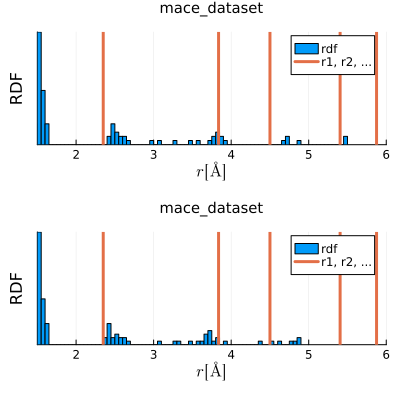

In [18]:

r_cut = 6.0u"Å"
rnn = 2.35

rdf_tiny = ACEpotentials.get_rdf(mace_dataset, r_cut; rescale = true)
plt_rdf_1 = histogram(rdf_tiny[(:C, :C)], bins=150, label = "rdf",
                      title="mace_dataset", titlefontsize=10,
                      xlabel = L"r[\AA]", ylabel = "RDF", yticks = [],
                      xlims=(1.5,6), size=(400,200), left_margin = 2Plots.mm)
vline!(rnn * [1.0, 1.633, 1.915, 2.3, 2.5], label = "r1, r2, ...", lw=3)

rdf = ACEpotentials.get_rdf(mace_dataset, r_cut; rescale = true);
plt_rdf_2 = histogram(rdf[(:C, :C)], bins=150, label = "rdf",
                      title="mace_dataset", titlefontsize=10,
                      xlabel = L"r[\AA]", ylabel = "RDF", yticks = [],
                      xlims=(1.5,6), size=(400,200), left_margin = 2Plots.mm)
vline!(rnn * [1.0, 1.633, 1.915, 2.3, 2.5], label = "r1, r2, ...", lw=3)

plot(plt_rdf_1, plt_rdf_2, layout=(2,1), size=(400,400))

In [48]:
model = ace1_model(elements = [:C, :H, :O, :N],
                   rcut = 5.5,
                   order = 3,        # body-order - 1
                   totaldegree = 8 );

In [49]:
descriptors = []
for system in mace_dataset
    struct_descriptor = sum(site_descriptors(system, model)) / length(system)
    push!(descriptors, struct_descriptor)
end
println("Computed descriptors for $(length(descriptors)) systems")

Computed descriptors for 10 systems


In [33]:
mace_dataset

9-element Vector{Atoms{@NamedTuple{species::Vector{ChemicalSpecies}, atomic_number::Vector{Int64}, position::Vector{Vector{Quantity{Float64, 𝐋, Unitful.FreeUnits{(Å,), 𝐋, nothing}}}}, mass::Vector{Quantity{Float64, 𝐌, Unitful.FreeUnits{(u,), 𝐌, nothing}}}, momenta::Vector{Vector{Float64}}, atomic_symbol::Vector{Symbol}, velocity::Vector{Vector{Quantity{Float64, 𝐋 𝐓⁻¹, Unitful.FreeUnits{(u⁻¹ᐟ², eV¹ᐟ²), 𝐋 𝐓⁻¹, nothing}}}}, forces::Vector{Vector{Float64}}}, @NamedTuple{energy::Float64, free_energy::Float64, periodicity::Tuple{Bool, Bool, Bool}, stress::Matrix{Float64}, cell_vectors::Tuple{StaticArraysCore.SVector{3, Quantity{Float64, 𝐋, Unitful.FreeUnits{(Å,), 𝐋, nothing}}}, StaticArraysCore.SVector{3, Quantity{Float64, 𝐋, Unitful.FreeUnits{(Å,), 𝐋, nothing}}}, StaticArraysCore.SVector{3, Quantity{Float64, 𝐋, Unitful.FreeUnits{(Å,), 𝐋, nothing}}}}}}}:
 Atoms(C₆H₁₂N₂O₂, periodicity = FFF)
 Atoms(C₆H₁₂N₂O₂, periodicity = FFF)
 Atoms(C₆H₁₂N₂O₂, periodicity = FFF)
 Atoms(C₆H₁₂N₂O₂, periodicit

In [44]:
# Check the cell vectors and periodicity
system = mace_dataset[1]
println("Periodicity: ", AtomsBase.periodicity(system))
println("Cell vectors: ", AtomsBase.bounding_box(system))
println("Cell: ", AtomsBase.cell(system))

# Check the cell matrix
cell_matrix = hcat(AtomsBase.cell(system)...)
println("\nCell matrix:")
display(cell_matrix)
println("\nAny NaN values? ", any(isnan.(cell_matrix)))

Periodicity: (true, true, true)


UndefVarError: UndefVarError: `bounding_box` not defined in `AtomsBase`
Suggestion: check for spelling errors or missing imports.